In [ ]:
# Required imports
import os
import subprocess

# Define target protein and the residue to center triangle attention on
PROT = "6KWC"
TRI_RESIDUE_IDX = 18

# Define all relevant directories
BASE_DATA_DIR = "/ime/hdd/rhaas/SUP-5301/database" # path to AlphaFold database

# Local paths for saving results (these probably can remain unchanged)
ATTN_MAP_DIR = f"./outputs/attention_files_{PROT}_demo_tri_{TRI_RESIDUE_IDX}" # directory for saving text files with top-k attention scores
ALIGNMENT_DIR = "./examples/monomer/alignments" # directory containing pre-computed alignment files (and MSAs)
OUTPUT_DIR = f"./outputs/my_outputs_align_{PROT}_demo_tri_{TRI_RESIDUE_IDX}" # directory to save outputs
IMAGE_OUTPUT_DIR = f"./outputs/attention_images_{PROT}_demo_tri_{TRI_RESIDUE_IDX}"
FASTA_DIR = f"./examples/monomer/fasta_dir_{PROT}"

# Note: If this is a new protein, the ALIGNMENT_DIR does not need to be specified here or in the next cell
# In this case, the code will compute MSAs and alignments, which can take several hours


In [9]:
# Run OpenFold inference and save top attention scores to text files 
inference_cmd = f"""
python3 run_pretrained_openfold.py \
    {FASTA_DIR} \
    {BASE_DATA_DIR}/pdb_mmcif/mmcif_files \
    --use_precomputed_alignments {ALIGNMENT_DIR} \
    --output_dir {OUTPUT_DIR} \
    --config_preset model_1_ptm \
    --uniref90_database_path {BASE_DATA_DIR}/uniref90/uniref90.fasta \
    --mgnify_database_path {BASE_DATA_DIR}/mgnify/mgy_clusters_2022_05.fa \
    --pdb70_database_path {BASE_DATA_DIR}/pdb70/pdb70 \
    --uniclust30_database_path {BASE_DATA_DIR}/uniclust30/uniclust30_2018_08 \
    --bfd_database_path {BASE_DATA_DIR}/bfd/bfd_metaclust_clu_complete_id30_c90_final_seq.sorted_opt \
    --save_outputs \
    --model_device "cuda:0" \
    --attn_map_dir {ATTN_MAP_DIR} \
    --num_recycles_save 1 \
    --triangle_residue_idx {TRI_RESIDUE_IDX} \
    --demo_attn
"""

subprocess.run(inference_cmd, shell=True, check=True)


CUDA available:  True
GPU name:  NVIDIA A100-SXM4-40GB
[2025-09-19 09:31:47,188] [INFO] [real_accelerator.py:203:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/u/thayes/anaconda3/envs/openfold_env3/lib/python3.10/site-packages/deepspeed/runtime/zero/linear.py:49: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  def forward(ctx, input, weight, bias=None):
/u/thayes/anaconda3/envs/openfold_env3/lib/python3.10/site-packages/deepspeed/runtime/zero/linear.py:67: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, grad_output):


args: 
Namespace(fasta_dir='./examples/monomer/fasta_dir_6KWC', template_mmcif_dir='/ime/hdd/rhaas/SUP-5301/database/pdb_mmcif/mmcif_files', use_precomputed_alignments='./examples/monomer/alignments', use_custom_template=False, use_single_seq_mode=False, output_dir='./outputs/my_outputs_align_6KWC_demo_tri_18', model_device='cuda:0', config_preset='model_1_ptm', jax_param_path=None, openfold_checkpoint_path=None, save_outputs=True, cpus=4, preset='full_dbs', output_postfix=None, data_random_seed=None, skip_relaxation=False, multimer_ri_gap=200, trace_model=False, subtract_plddt=False, long_sequence_inference=False, cif_output=False, experiment_config_json='', use_deepspeed_evoformer_attention=False, attn_map_dir='./outputs/attention_files_6KWC_demo_tri_18', num_recycles_save=1, demo_attn=True, triangle_residue_idx=18, enable_chunking=False, uniref90_database_path='/ime/hdd/rhaas/SUP-5301/database/uniref90/uniref90.fasta', mgnify_database_path='/ime/hdd/rhaas/SUP-5301/database/mgnify/mg

INFO:/u/thayes/openfold/openfold/utils/script_utils.py:Successfully loaded JAX parameters at openfold/resources/params/params_model_1_ptm.npz...
INFO:/u/thayes/openfold/run_pretrained_openfold.py:Using precomputed alignments for 6KWC_1 at ./examples/monomer/alignments...
INFO:/u/thayes/openfold/openfold/utils/script_utils.py:Running inference for 6KWC_1...


RECYCLING STEP  0
	evo_block_0_recycle_0
[Done] Saved top 500 entries for msa_row_attn to ./outputs/attention_files_6KWC_demo_tri_18/msa_row_attn_layer0.txt
[Done] Saved top 500 entries for triangle_start_attn to ./outputs/attention_files_6KWC_demo_tri_18/triangle_start_attn_layer0_residue_idx_18.txt
	evo_block_1_recycle_0
[Done] Saved top 500 entries for msa_row_attn to ./outputs/attention_files_6KWC_demo_tri_18/msa_row_attn_layer1.txt
[Done] Saved top 500 entries for triangle_start_attn to ./outputs/attention_files_6KWC_demo_tri_18/triangle_start_attn_layer1_residue_idx_18.txt
	evo_block_2_recycle_0
[Done] Saved top 500 entries for msa_row_attn to ./outputs/attention_files_6KWC_demo_tri_18/msa_row_attn_layer2.txt
[Done] Saved top 500 entries for triangle_start_attn to ./outputs/attention_files_6KWC_demo_tri_18/triangle_start_attn_layer2_residue_idx_18.txt
	evo_block_3_recycle_0
[Done] Saved top 500 entries for msa_row_attn to ./outputs/attention_files_6KWC_demo_tri_18/msa_row_attn_la

INFO:/u/thayes/openfold/openfold/utils/script_utils.py:Inference time: 66.01012702472508
INFO:/u/thayes/openfold/run_pretrained_openfold.py:Output written to ./outputs/my_outputs_align_6KWC_demo_tri_18/predictions/6KWC_1_model_1_ptm_unrelaxed.pdb...
INFO:/u/thayes/openfold/run_pretrained_openfold.py:Running relaxation on ./outputs/my_outputs_align_6KWC_demo_tri_18/predictions/6KWC_1_model_1_ptm_unrelaxed.pdb...
INFO:/u/thayes/openfold/openfold/utils/script_utils.py:Relaxation time: 6.913141839206219
INFO:/u/thayes/openfold/openfold/utils/script_utils.py:Relaxed output written to ./outputs/my_outputs_align_6KWC_demo_tri_18/predictions/6KWC_1_model_1_ptm_relaxed.pdb...
INFO:/u/thayes/openfold/run_pretrained_openfold.py:Model output written to ./outputs/my_outputs_align_6KWC_demo_tri_18/predictions/6KWC_1_model_1_ptm_output_dict.pkl...


CompletedProcess(args='\npython3 run_pretrained_openfold.py     ./examples/monomer/fasta_dir_6KWC     /ime/hdd/rhaas/SUP-5301/database/pdb_mmcif/mmcif_files     --use_precomputed_alignments ./examples/monomer/alignments     --output_dir ./outputs/my_outputs_align_6KWC_demo_tri_18     --config_preset model_1_ptm     --uniref90_database_path /ime/hdd/rhaas/SUP-5301/database/uniref90/uniref90.fasta     --mgnify_database_path /ime/hdd/rhaas/SUP-5301/database/mgnify/mgy_clusters_2022_05.fa     --pdb70_database_path /ime/hdd/rhaas/SUP-5301/database/pdb70/pdb70     --uniclust30_database_path /ime/hdd/rhaas/SUP-5301/database/uniclust30/uniclust30_2018_08     --bfd_database_path /ime/hdd/rhaas/SUP-5301/database/bfd/bfd_metaclust_clu_complete_id30_c90_final_seq.sorted_opt     --save_outputs     --model_device "cuda:0"     --attn_map_dir ./outputs/attention_files_6KWC_demo_tri_18     --num_recycles_save 1     --triangle_residue_idx 18     --demo_attn\n', returncode=0)

Saved image to ./outputs/attention_images_6KWC_demo_tri_18/predicted_structure_6KWC_tri_18.png


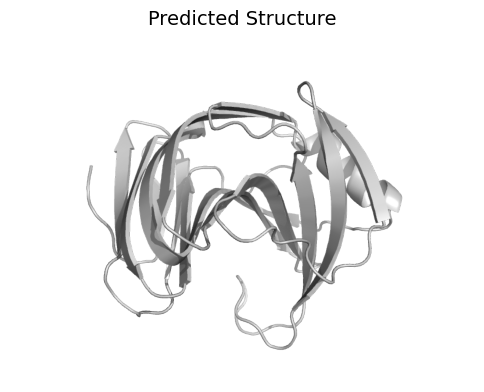

In [10]:
# Render predicted 3D structure and save as PNG image
from visualize_attention_general_utils import render_pdb_to_image

PDB_FILE = os.path.join(OUTPUT_DIR, f"predictions/{PROT}_1_model_1_ptm_relaxed.pdb")
FNAME = f"predicted_structure_{PROT}_tri_{TRI_RESIDUE_IDX}.png"

render_pdb_to_image(PDB_FILE, IMAGE_OUTPUT_DIR, FNAME)


Drawing 50 connections
Saved snapshot to ./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_0_layer_47_6KWC.png
Drawing 50 connections
Saved snapshot to ./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_1_layer_47_6KWC.png
Drawing 50 connections
Saved snapshot to ./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_2_layer_47_6KWC.png
Drawing 50 connections
Saved snapshot to ./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_3_layer_47_6KWC.png
Drawing 50 connections
Saved snapshot to ./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_4_layer_47_6KWC.png
Drawing 50 connections
Saved snapshot to ./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_5_layer_47_6KWC.png
Drawing 50 connections
Saved snapshot to ./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_6_layer_47_6KWC.png
Drawin

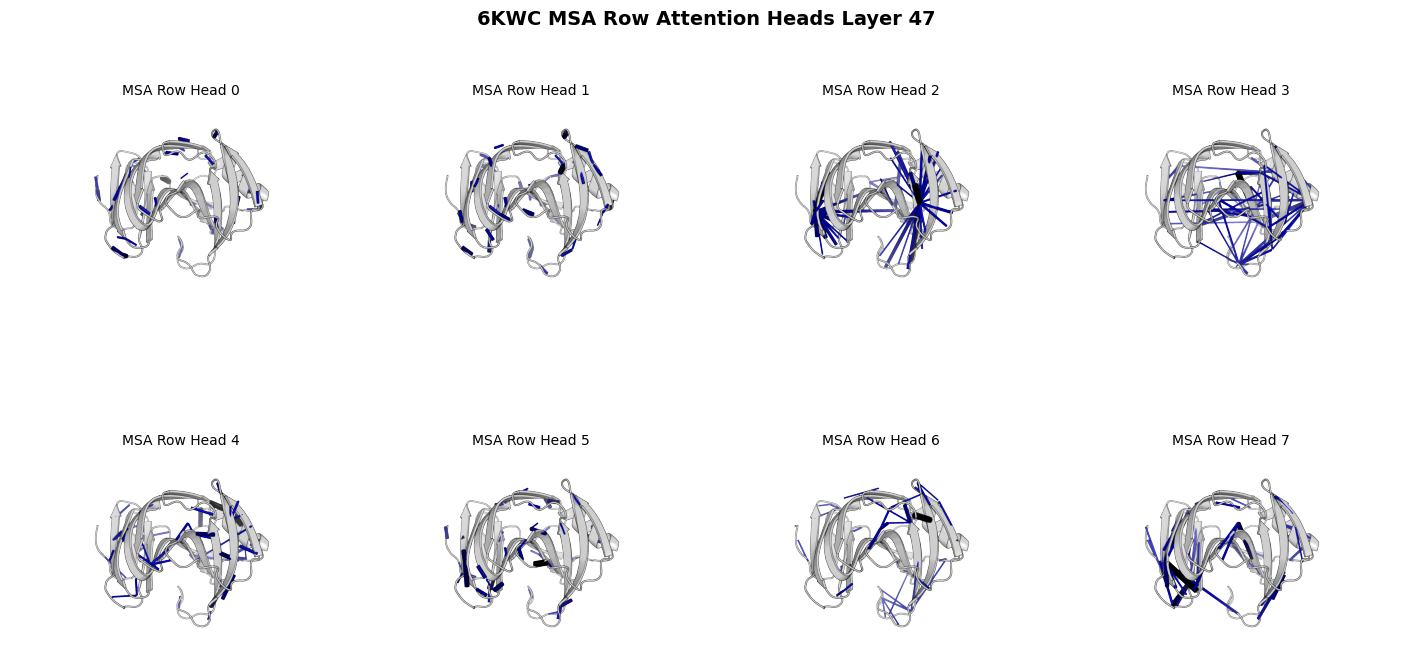

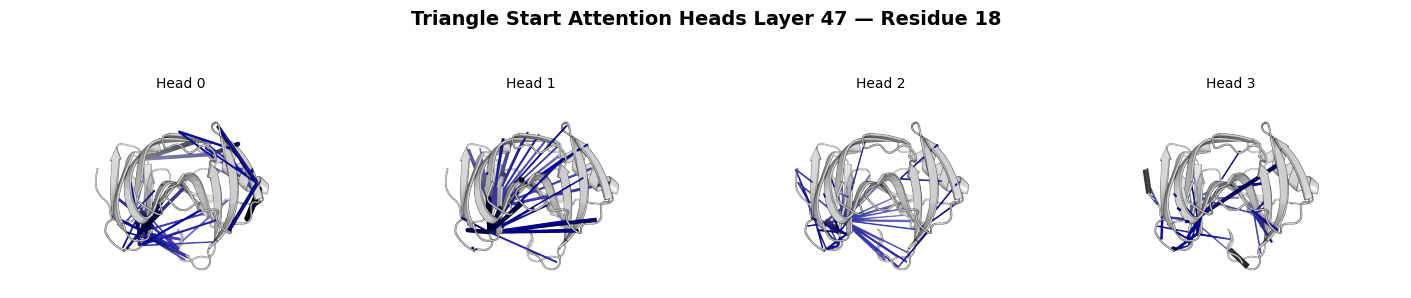

In [11]:
# Import visualization utilities
from visualize_attention_3d_demo_utils import plot_pymol_attention_heads
from visualize_attention_arc_diagram_demo_utils import generate_arc_diagrams, parse_fasta_sequence

# Setup visualization output directories
output_dir_msa = os.path.join(IMAGE_OUTPUT_DIR, 'msa_row_attention_plots') # directory for saving msa attention 3D visuals
output_dir_tri = os.path.join(IMAGE_OUTPUT_DIR, 'tri_start_attention_plots') # directory for saving triangle attention 3D visuals
FASTA_PATH = f"/u/thayes/vizfold/examples/monomer/fasta_dir_{PROT}/{PROT}.fasta"
LAYER_IDX = 47 # selected layer for attention evaluation
TOP_K = 50 # show top-k attention links (limit to 500)

# Generate 3D attention plots for MSA row attention
plot_pymol_attention_heads(
    pdb_file=PDB_FILE,
    attention_dir=ATTN_MAP_DIR,
    output_dir=output_dir_msa,
    protein=PROT,
    attention_type="msa_row",
    top_k=TOP_K,
    layer_idx=LAYER_IDX
)

# Generate 3D attention plots for triangle start attention
plot_pymol_attention_heads(
    pdb_file=PDB_FILE,
    attention_dir=ATTN_MAP_DIR,
    output_dir=output_dir_tri,
    protein=PROT,
    attention_type="triangle_start",
    residue_indices=[TRI_RESIDUE_IDX],
    top_k=TOP_K,
    layer_idx=LAYER_IDX
)

# Parse FASTA for arc diagrams
residue_seq = parse_fasta_sequence(FASTA_PATH)

# Generate arc diagrams for MSA row attention
generate_arc_diagrams(
    attention_dir=ATTN_MAP_DIR,
    residue_sequence=residue_seq,
    output_dir=output_dir_msa,
    protein=PROT,
    attention_type="msa_row",
    top_k=TOP_K,
    layer_idx=LAYER_IDX
)

# Generate arc diagrams for triangle start attention
generate_arc_diagrams(
    attention_dir=ATTN_MAP_DIR,
    residue_sequence=residue_seq,
    output_dir=output_dir_tri,
    protein=PROT,
    attention_type="triangle_start",
    residue_indices=[TRI_RESIDUE_IDX],
    top_k=TOP_K,
    layer_idx=LAYER_IDX
)




./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_0_layer_47_6KWC.png
./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_0_layer_47_6KWC_arc.png
./outputs/attention_images_6KWC_demo_tri_18/msa_row_head_0_layer_47_6KWC_combo.png


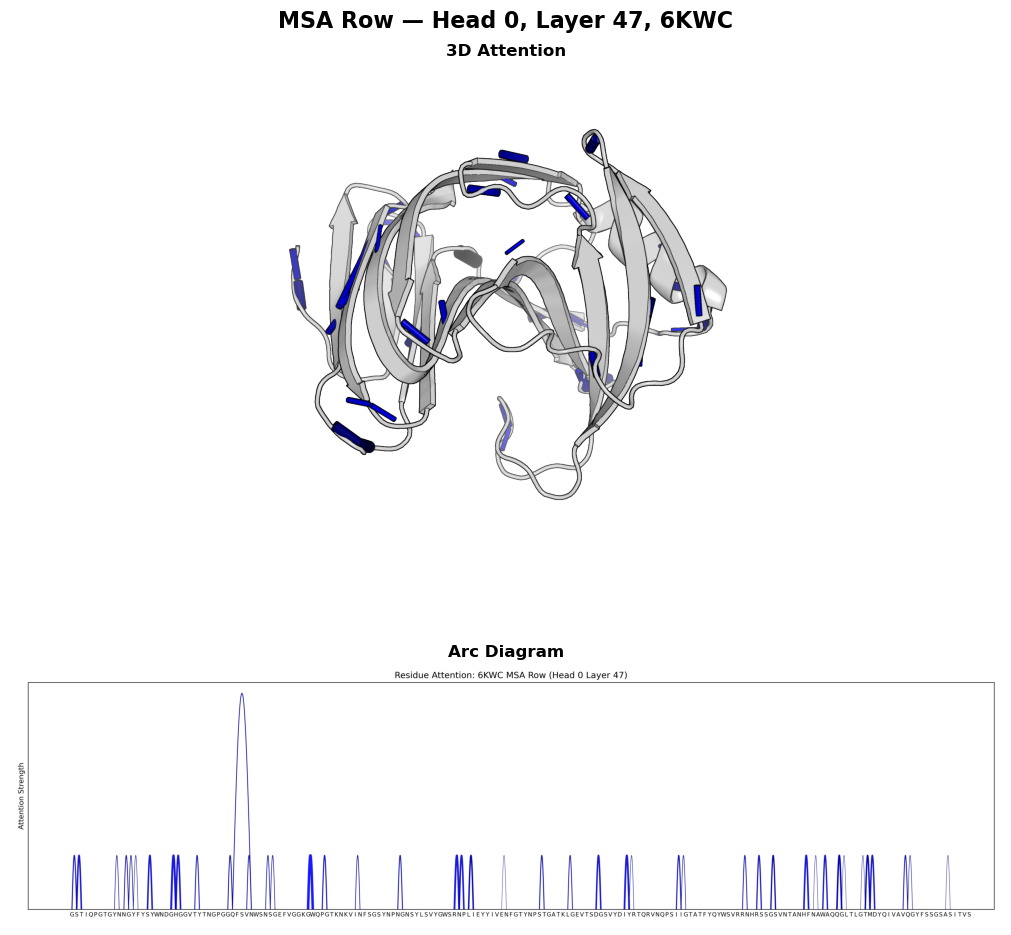

[Saved] Combined panel to ./outputs/attention_images_6KWC_demo_tri_18/msa_row_head_0_layer_47_6KWC_combo.png


./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_1_layer_47_6KWC.png
./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_1_layer_47_6KWC_arc.png
./outputs/attention_images_6KWC_demo_tri_18/msa_row_head_1_layer_47_6KWC_combo.png


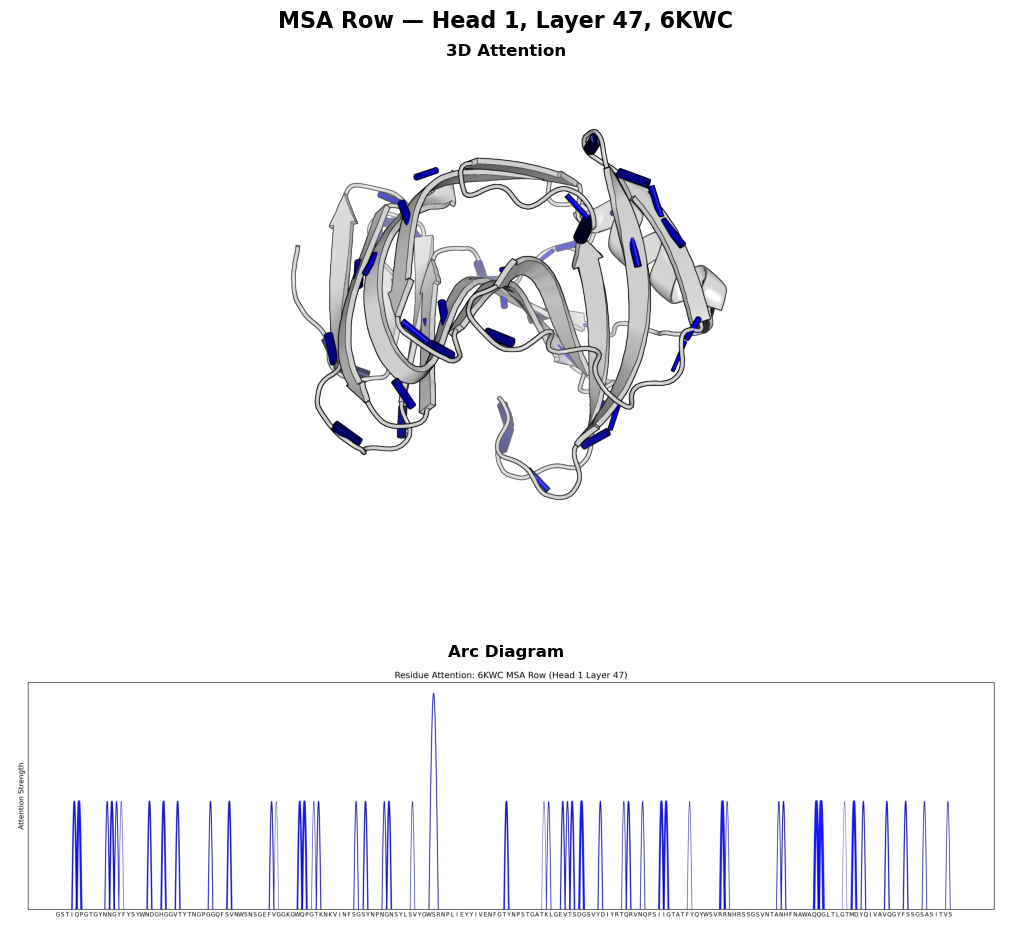

[Saved] Combined panel to ./outputs/attention_images_6KWC_demo_tri_18/msa_row_head_1_layer_47_6KWC_combo.png


./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_2_layer_47_6KWC.png
./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_2_layer_47_6KWC_arc.png
./outputs/attention_images_6KWC_demo_tri_18/msa_row_head_2_layer_47_6KWC_combo.png


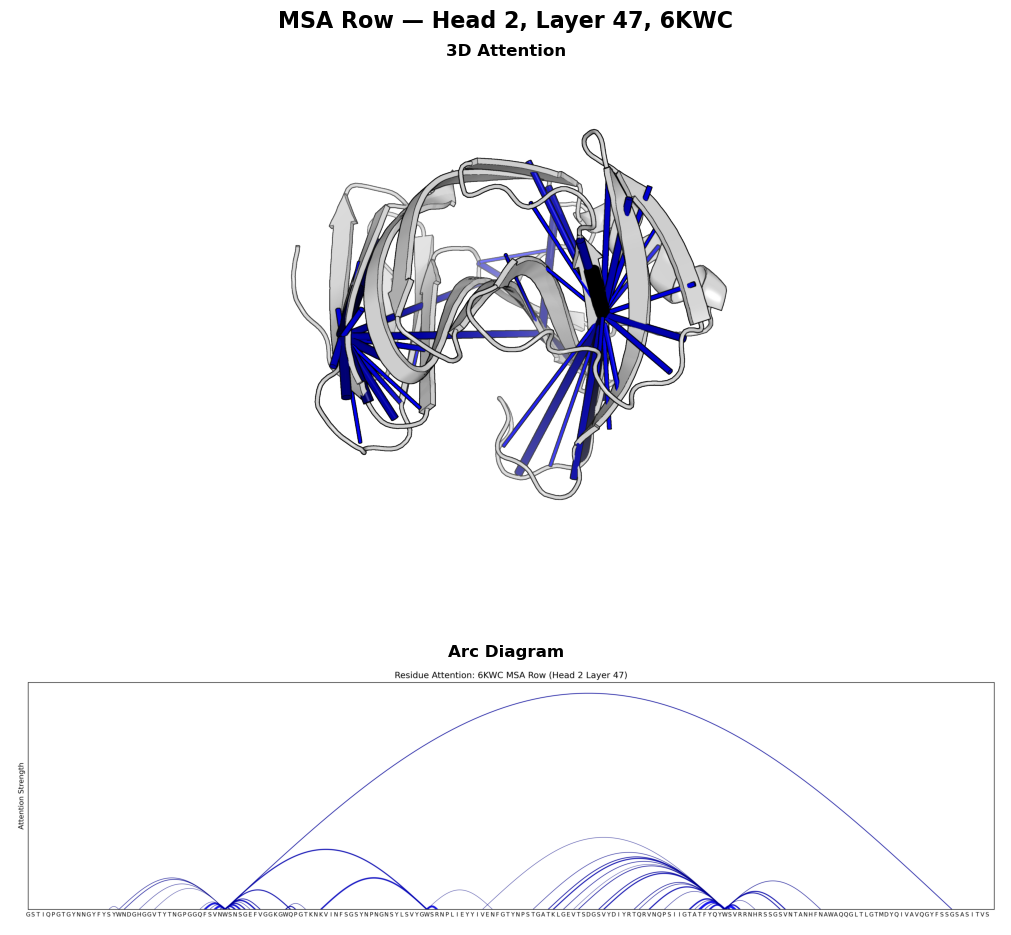

[Saved] Combined panel to ./outputs/attention_images_6KWC_demo_tri_18/msa_row_head_2_layer_47_6KWC_combo.png


./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_3_layer_47_6KWC.png
./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_3_layer_47_6KWC_arc.png
./outputs/attention_images_6KWC_demo_tri_18/msa_row_head_3_layer_47_6KWC_combo.png


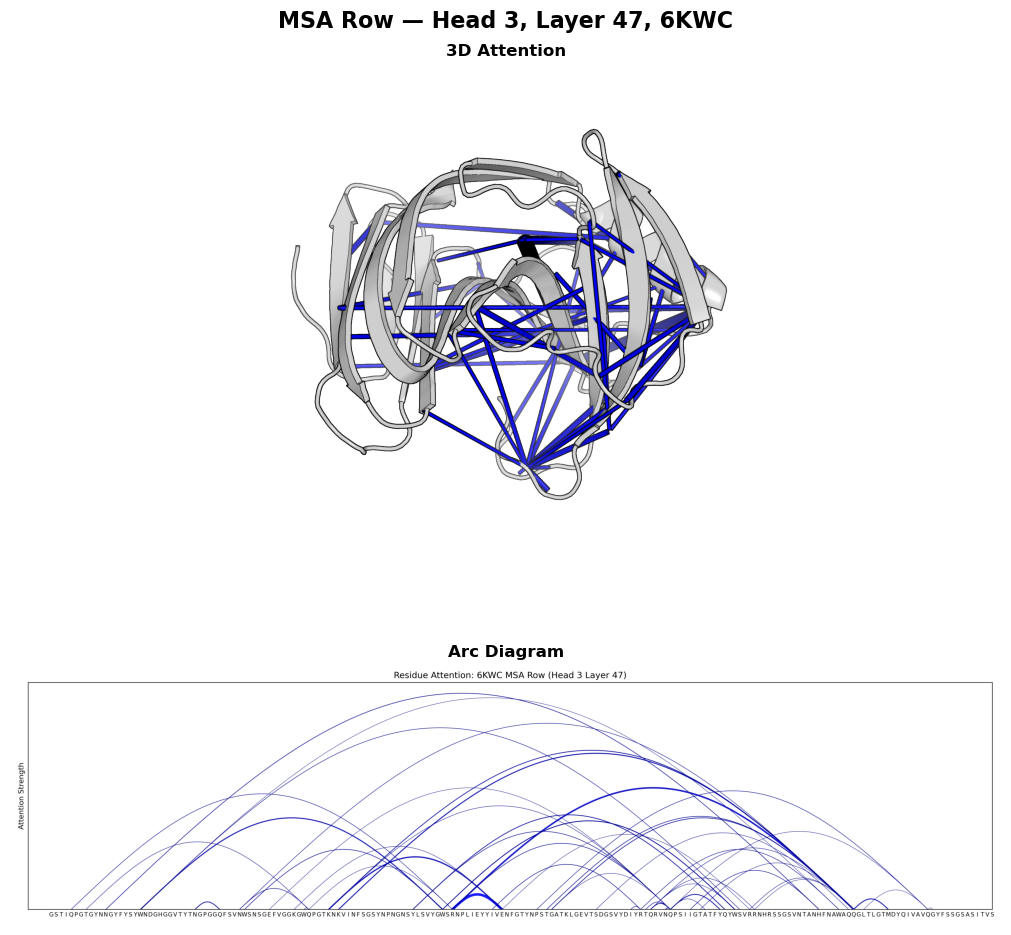

[Saved] Combined panel to ./outputs/attention_images_6KWC_demo_tri_18/msa_row_head_3_layer_47_6KWC_combo.png


./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_4_layer_47_6KWC.png
./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_4_layer_47_6KWC_arc.png
./outputs/attention_images_6KWC_demo_tri_18/msa_row_head_4_layer_47_6KWC_combo.png


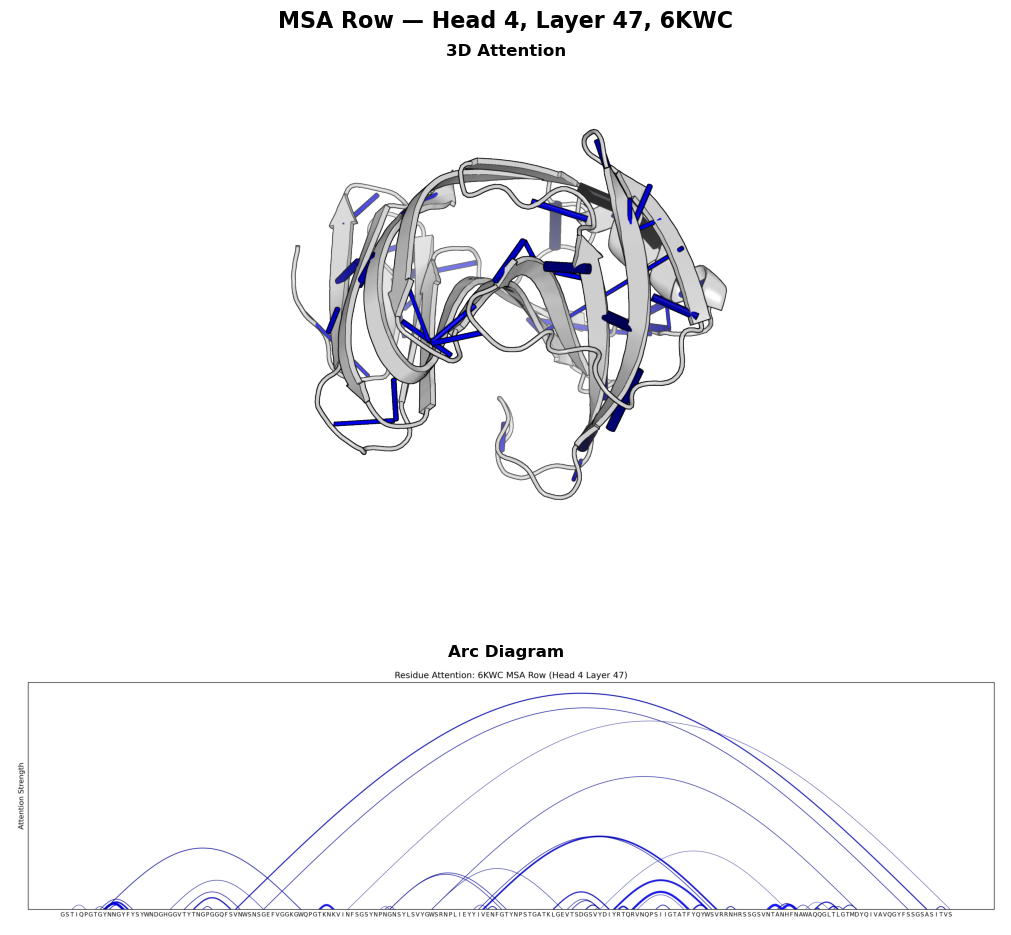

[Saved] Combined panel to ./outputs/attention_images_6KWC_demo_tri_18/msa_row_head_4_layer_47_6KWC_combo.png


./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_5_layer_47_6KWC.png
./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_5_layer_47_6KWC_arc.png
./outputs/attention_images_6KWC_demo_tri_18/msa_row_head_5_layer_47_6KWC_combo.png


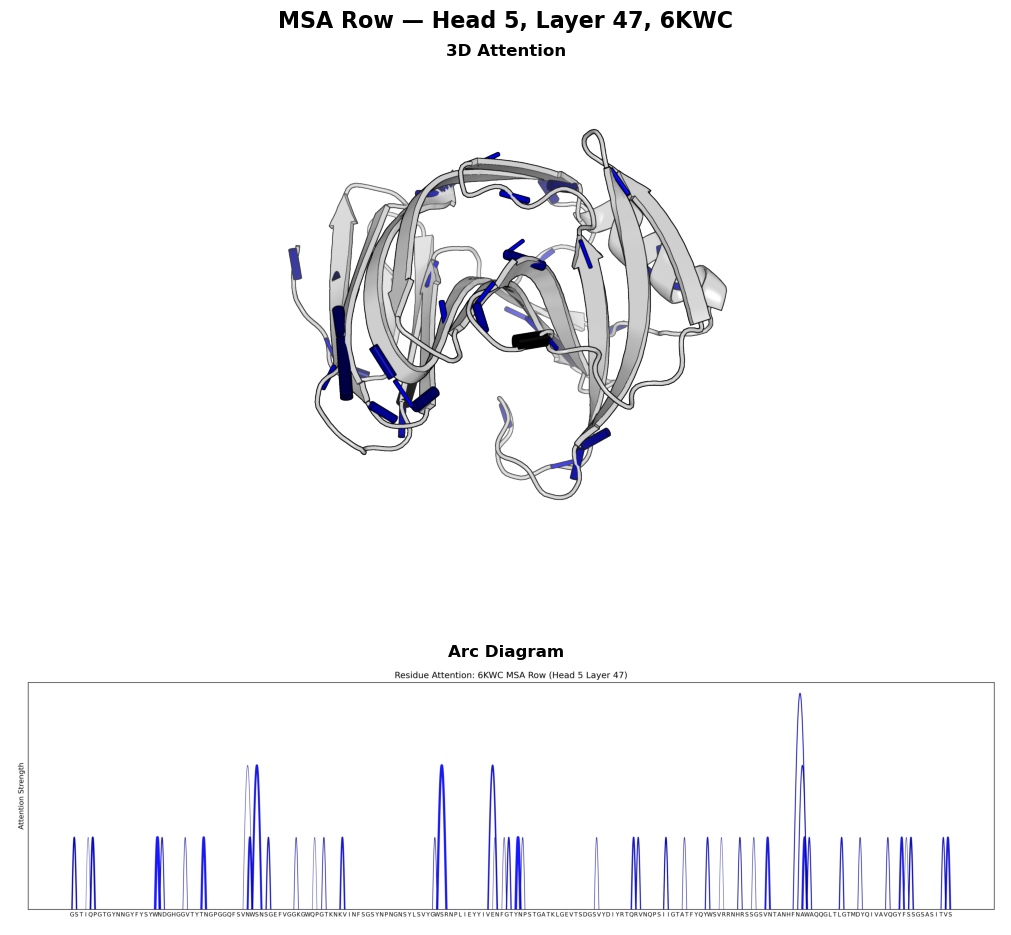

[Saved] Combined panel to ./outputs/attention_images_6KWC_demo_tri_18/msa_row_head_5_layer_47_6KWC_combo.png


./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_6_layer_47_6KWC.png
./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_6_layer_47_6KWC_arc.png
./outputs/attention_images_6KWC_demo_tri_18/msa_row_head_6_layer_47_6KWC_combo.png


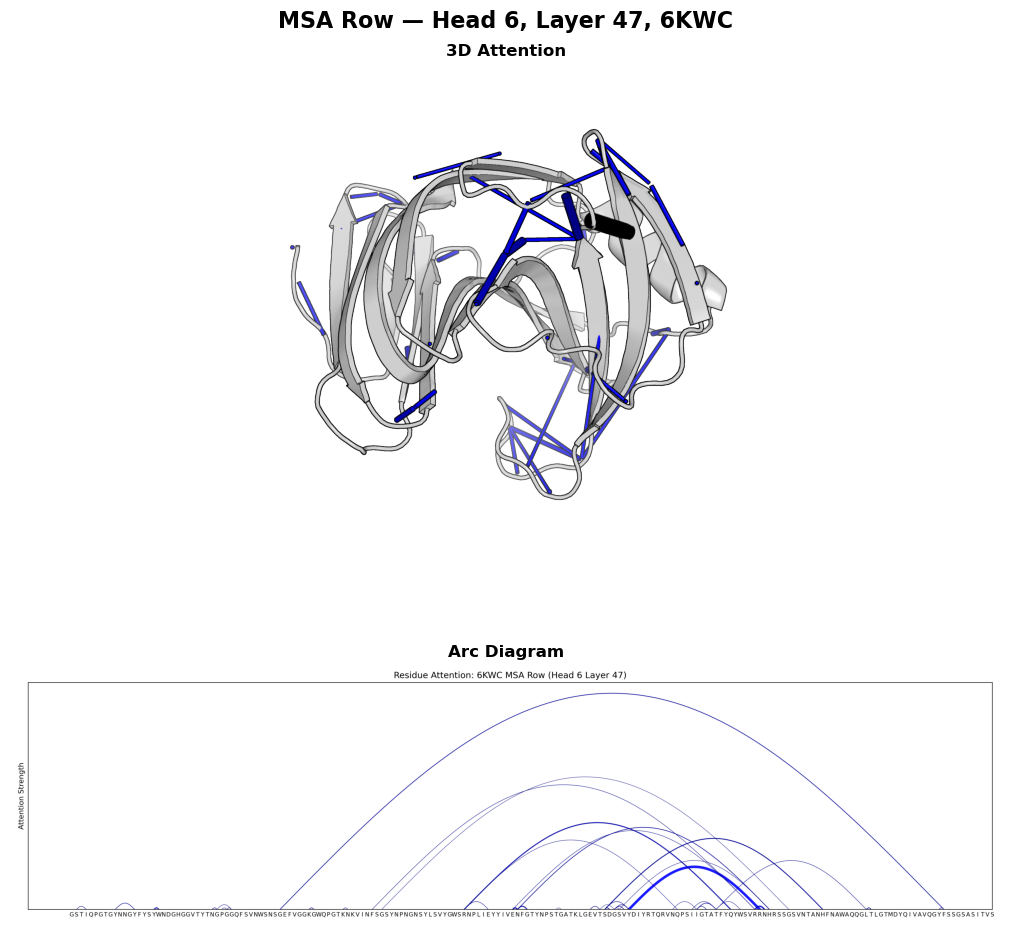

[Saved] Combined panel to ./outputs/attention_images_6KWC_demo_tri_18/msa_row_head_6_layer_47_6KWC_combo.png


./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_7_layer_47_6KWC.png
./outputs/attention_images_6KWC_demo_tri_18/msa_row_attention_plots/msa_row_head_7_layer_47_6KWC_arc.png
./outputs/attention_images_6KWC_demo_tri_18/msa_row_head_7_layer_47_6KWC_combo.png


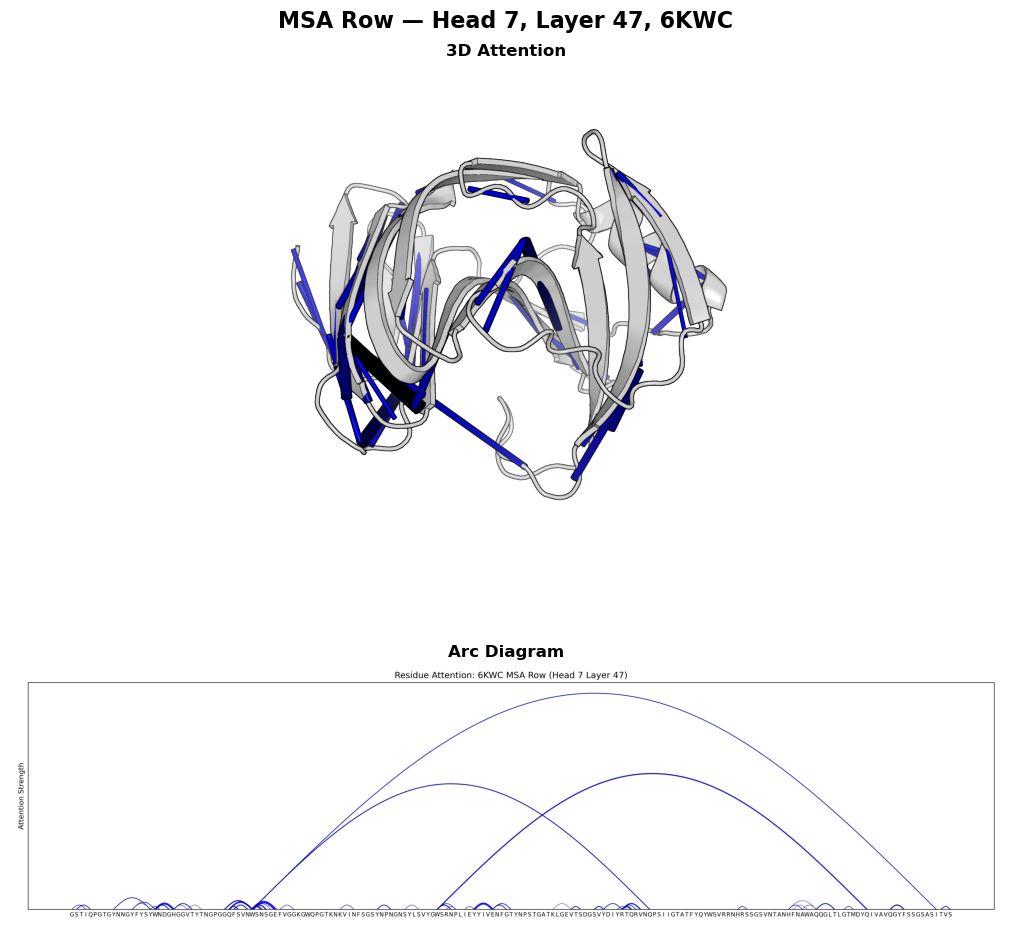

[Saved] Combined panel to ./outputs/attention_images_6KWC_demo_tri_18/msa_row_head_7_layer_47_6KWC_combo.png


./outputs/attention_images_6KWC_demo_tri_18/tri_start_attention_plots/tri_start_residue_18_head_0_layer_47_6KWC.png
./outputs/attention_images_6KWC_demo_tri_18/tri_start_attention_plots/tri_start_res_18_head_0_layer_47_6KWC_arc.png
./outputs/attention_images_6KWC_demo_tri_18/tri_start_residue_18_head_0_layer_47_6KWC_combo.png


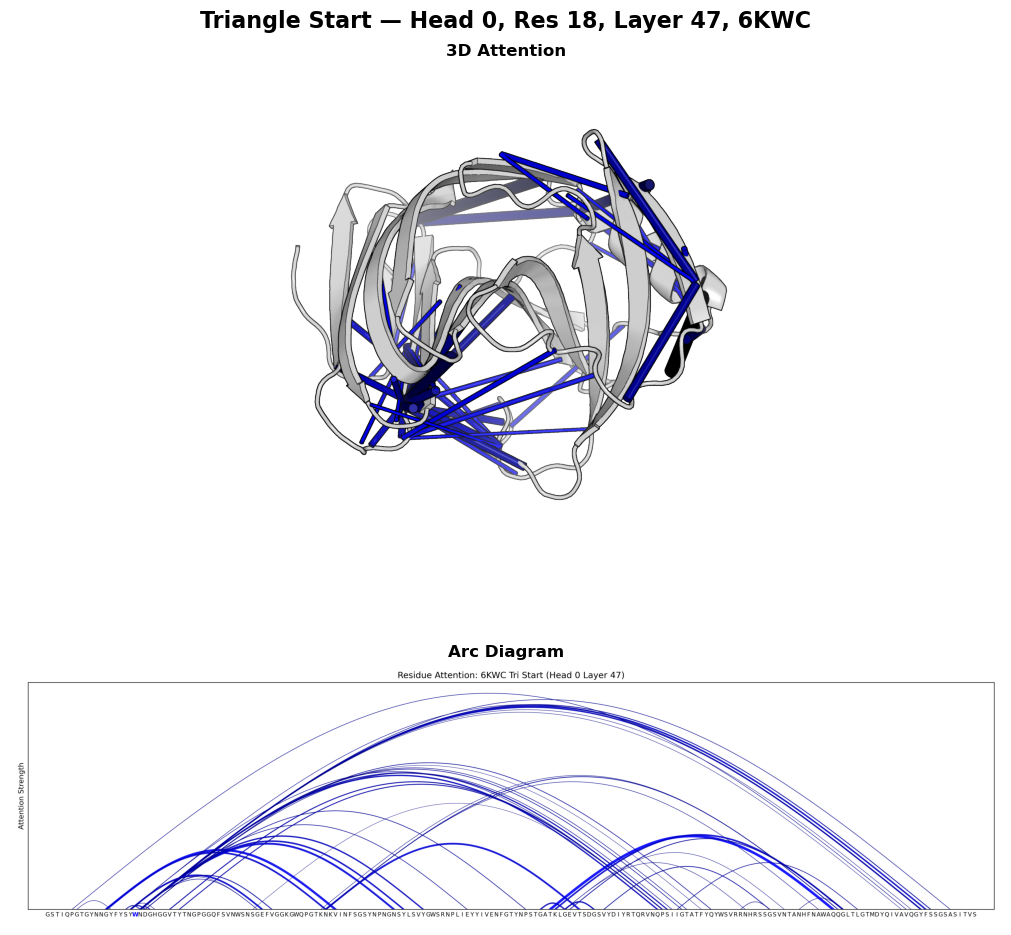

[Saved] Combined panel to ./outputs/attention_images_6KWC_demo_tri_18/tri_start_residue_18_head_0_layer_47_6KWC_combo.png


./outputs/attention_images_6KWC_demo_tri_18/tri_start_attention_plots/tri_start_residue_18_head_1_layer_47_6KWC.png
./outputs/attention_images_6KWC_demo_tri_18/tri_start_attention_plots/tri_start_res_18_head_1_layer_47_6KWC_arc.png
./outputs/attention_images_6KWC_demo_tri_18/tri_start_residue_18_head_1_layer_47_6KWC_combo.png


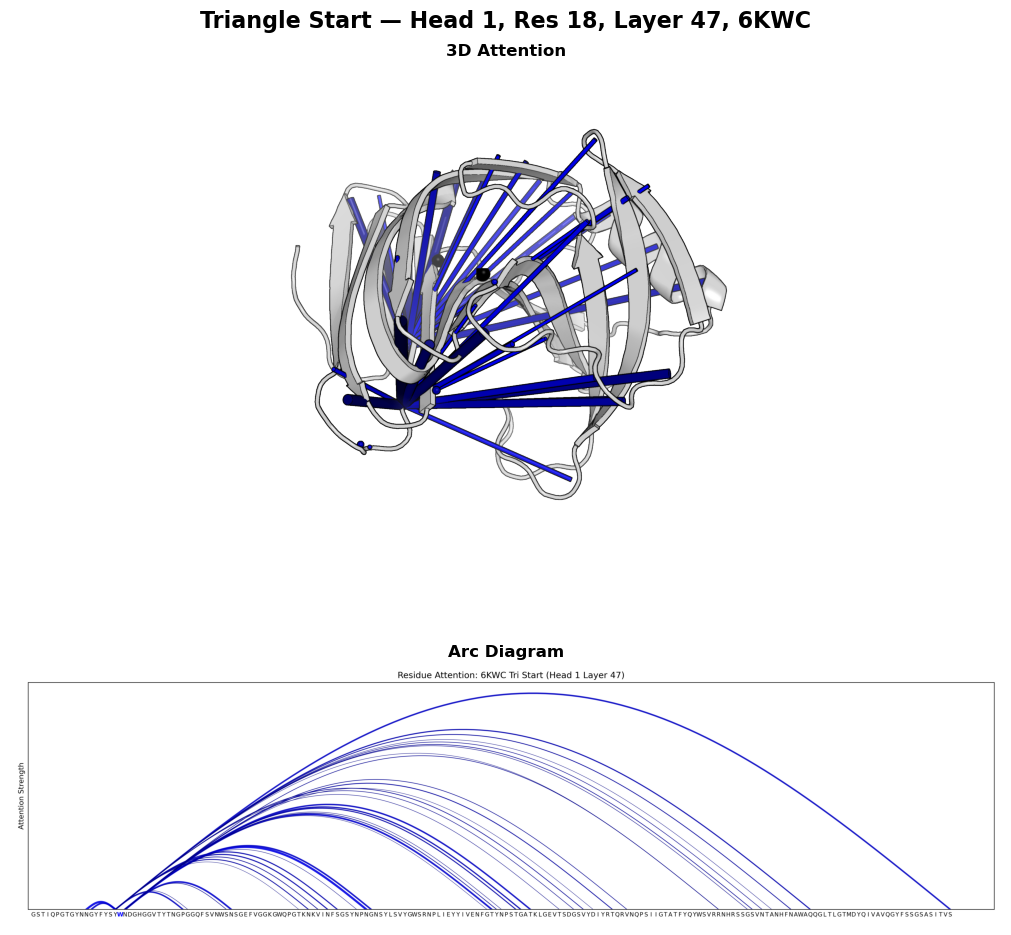

[Saved] Combined panel to ./outputs/attention_images_6KWC_demo_tri_18/tri_start_residue_18_head_1_layer_47_6KWC_combo.png


./outputs/attention_images_6KWC_demo_tri_18/tri_start_attention_plots/tri_start_residue_18_head_2_layer_47_6KWC.png
./outputs/attention_images_6KWC_demo_tri_18/tri_start_attention_plots/tri_start_res_18_head_2_layer_47_6KWC_arc.png
./outputs/attention_images_6KWC_demo_tri_18/tri_start_residue_18_head_2_layer_47_6KWC_combo.png


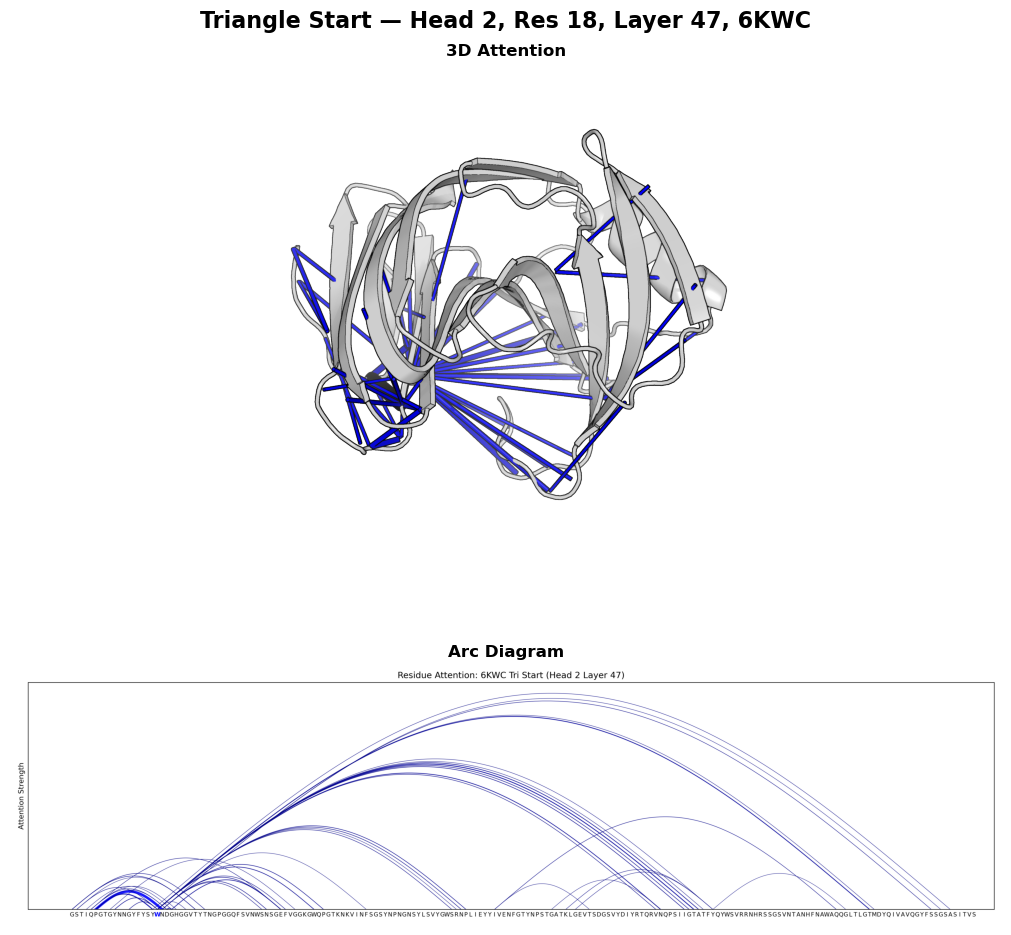

[Saved] Combined panel to ./outputs/attention_images_6KWC_demo_tri_18/tri_start_residue_18_head_2_layer_47_6KWC_combo.png


./outputs/attention_images_6KWC_demo_tri_18/tri_start_attention_plots/tri_start_residue_18_head_3_layer_47_6KWC.png
./outputs/attention_images_6KWC_demo_tri_18/tri_start_attention_plots/tri_start_res_18_head_3_layer_47_6KWC_arc.png
./outputs/attention_images_6KWC_demo_tri_18/tri_start_residue_18_head_3_layer_47_6KWC_combo.png


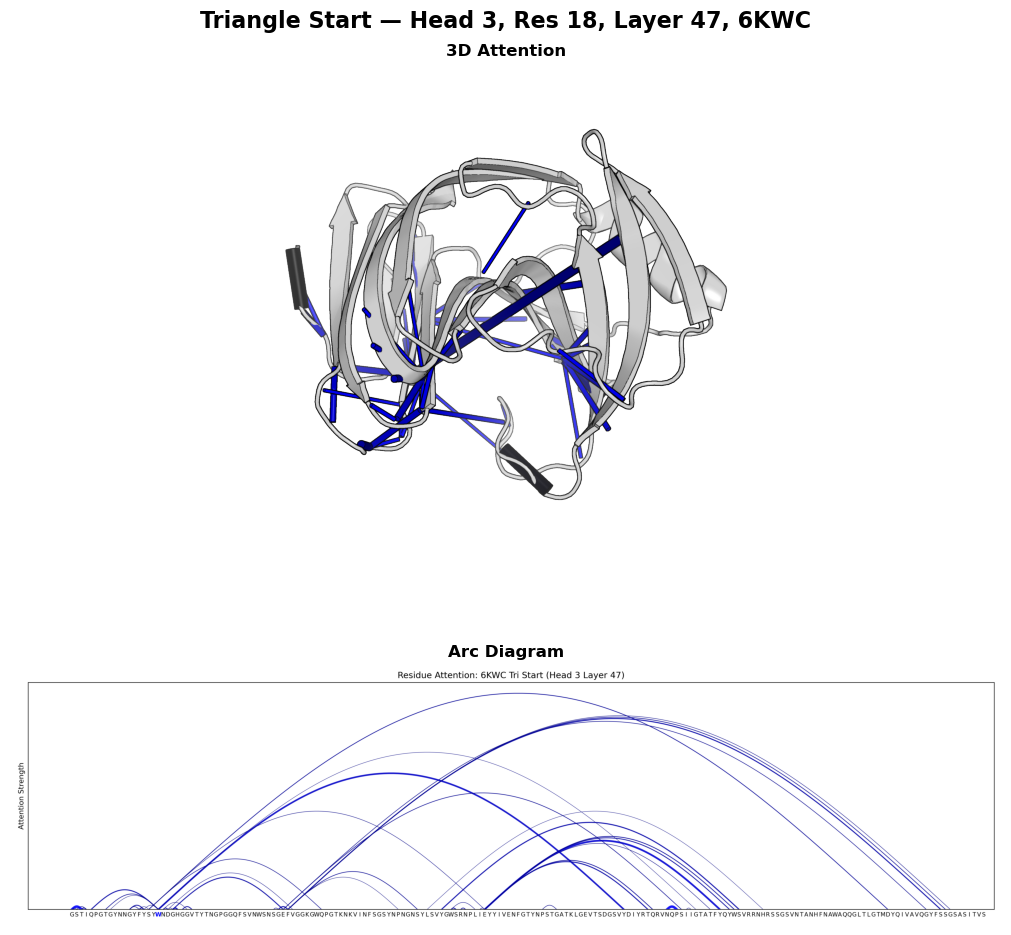

[Saved] Combined panel to ./outputs/attention_images_6KWC_demo_tri_18/tri_start_residue_18_head_3_layer_47_6KWC_combo.png


In [12]:
# Import function for combining attention plots
from visualize_attention_general_utils import generate_combined_attention_panels

# Combine MSA row plots
generate_combined_attention_panels(
    attention_type="msa_row",
    protein=PROT,
    layer_idx=LAYER_IDX,
    output_dir_3d=output_dir_msa,
    output_dir_arc=output_dir_msa,
    combined_output_dir=IMAGE_OUTPUT_DIR,
)

# Combine triangle start plots
generate_combined_attention_panels(
    attention_type="triangle_start",
    protein=PROT,
    layer_idx=LAYER_IDX,
    output_dir_3d=output_dir_tri,
    output_dir_arc=output_dir_tri,
    combined_output_dir=IMAGE_OUTPUT_DIR,
    residue_indices=[TRI_RESIDUE_IDX]
)
